# Домашняя работа №2 - Метод главных компонент и k-ближайших соседей

**Студент:** Феоктистов Владислав

**Группа:** НПМбд-01-19 (2я погруппа)

**Задача:** реализовать  метод  главных  компонент,  позволяющий выделять  наиболее  существенную  информацию  из  данных  с  помощью  линейных преобразований  и  с  помощью  него  и  алгоритма  k-ближайших  соседей  решить  задачу распознавания рукописных цифр.

Для начала загрузим вспомогательные библиотеки

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

После чего:
1. скачаем  базу  данных  digits  при  помощи  функции load_digits из пакета sklearn.datasets. Получим массивы картинок в виде массива X, а также ответов labels.  
2. при  помощи  функции  matplotlib.pyplot.imshow  нарисуем  несколько  примеров картинок из X. Чтобы картинки шли в виде массива, а не друг под другом, используем функцию subplots. 

In [2]:
def download_db():
    """
    Функция для загрузки базы данных digits из пакета sklearn.datasets
    :return: X - массив картинок, labels - массив ответов
    """
    digits = load_digits()
    fig, ax = plt.subplots(1,10)
    for i in range(10):
        ax[i].imshow(digits.images[i], cmap = 'gray')
    X = digits['data']
    labels = digits['target']
    return X, labels

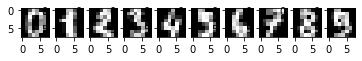

In [3]:
X, labels = download_db()

## Алгоритм PCA (Метод главных компонент)

Метод главных компонент состоит из следующих 4-х шагов:  

1) Центрирование данных: $X_c = X - \overline{X}$, где $\overline{X}$ – среднее для каждого параметра

2) Вычисление матрицы ковариации: $C = X_c^T \cdot X_c$

3) Вычисление собственных векторов $F$ и значений $\lambda$ матрицы ковариации $C$. 

4) Преобразование данных в координаты в базисе главных компонент: $Y = X_c \cdot F$

Перейдем к реализации метода главных компонент внутри класса *PCA*. Создадим шаблон класса *PCA*:

In [ ]:
class PCA(): 
    
    """
    Метод главных компонент.
    """
    
    def __init__(self, n_components=None): 
        self.n_components = n_components   
    
    def fit(self, X): 
        pass     
    
    def transform(self, X_с, F): 
        pass     
    
    def fit_transform(self, X): 
        pass

Сперва реализуем описанные выше шаги 1-3 внутри метода *fit()* класса *PCA*. При  реализации  шага  3  использую  функцию numpy.linalg.eig.

In [ ]:
def fit(self, X):
    """
    Вычисление центрированных данных X_c, собственных значений l и собственных векторов F 
    матрицы ковариации 𝐶.
    :param X: массив картинок из датасета
    :return: X_c - центрированные данные, F - собственные векторы, l - собственные значения
    """
    X_av = np.mean(X, axis = 0)
    X_c = X - X_av
    C = X_c.T @ X_c
    l, F = np.linalg.eigh(C)
    # Меняем порядок
    l = l[::-1]
    F = F[:, ::-1]
    return X_c, F, l 

Затем реализуем шаг 4 в методе *transform()*.

In [ ]:
def transform(self, X_с, F):
    """
    Преобразование данных в координаты в базисе главных компонент.
    :param X_c: центрированные данные
    :param F: собственные вектора матрицы ковариации C
    :return: Y - преобразованные данные
    """
    return X_с @ F

Метод *fit_transform()* выдает решение задачи метода главных компонент, используя предыдущие методы.

In [ ]:
def fit_transform(self, X):
    """
    Решение задачи метода главных компонент.
    :param X: массив картинок из датасета
    :return: Y - решение
    """
    X_c, F = self.fit(X)
    Y = self.transform(X_c, F)
    if self.n_components != None:
        Y = Y[:, :self.n_components]
    return Y

Итого получаем такую реализацию класса *PCA*:

In [4]:
class PCA(): 
    
    """
    Метод главных компонент.
    """
    
    def __init__(self, n_components=None): 
        self.n_components = n_components
    
    def fit(self, X):
        """
        Вычисление центрированных данных X_c, собственных значений l и собственных векторов F 
        матрицы ковариации 𝐶.
        :param X: массив картинок из датасета
        :return: X_c - центрированные данные, F - собственные векторы, l - собственные значения
        """
        X_av = np.mean(X, axis = 0)
        X_c = X - X_av
        C = X_c.T @ X_c
        l, F = np.linalg.eigh(C)
        # Меняем порядок
        l = l[::-1]
        F = F[:, ::-1]
        return X_c, F, l    
    
    def transform(self, X_с, F):
        """
        Преобразование данных в координаты в базисе главных компонент.
        :param X_c: центрированные данные
        :param F: собственные вектора матрицы ковариации C
        :return: Y - преобразованные данные
        """
        return X_с @ F     
    
    def fit_transform(self, X):
        """
        Решение задачи метода главных компонент.
        :param X: массив картинок из датасета
        :return: Y - решение
        """
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :self.n_components]
        return Y

Построим график собственных значений, а также график отношения кумулятивной суммы к их полной сумме. А также посмотрим, какую долю дисперсии данных покрывают первые 15 главных компонент и как связаны между собой собственные числа и дисперсия данных.

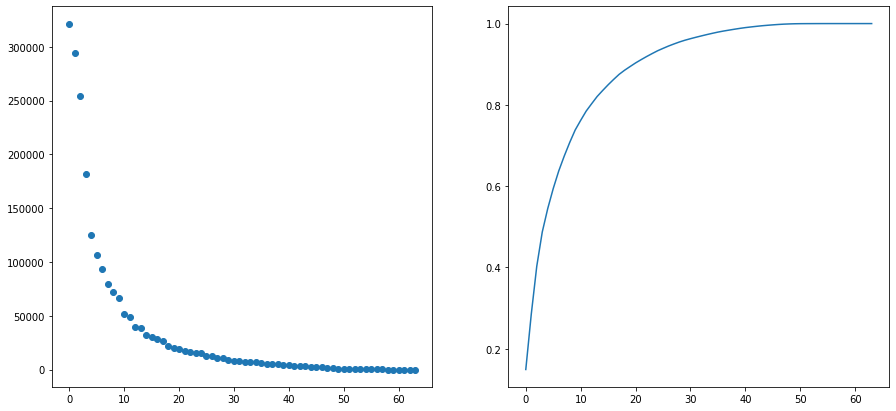

In [5]:
test = PCA(2)

_, _, l = test.fit(X)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))

axes[0].plot(l, marker = 'o', linestyle = '')
axes[1].plot(np.cumsum(l) / np.sum(l))

Как можно заметить основную долю вносят первые собственные значения. Первые 15 главных компонент покрывают большую долю дисперсии данных.

Изобразим на графике точки датасета в первых двух координатах главных компонент. Разным цифрам соответствуют разные цвета. 

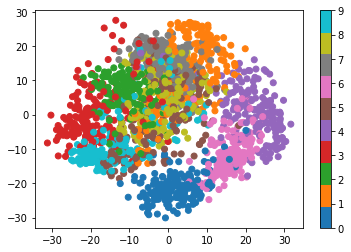

In [6]:
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'tab10')
plt.colorbar()

Можем увидеть отдельные кластеры, окрашенные в цвета, соответствующие определённой цифре.

## Алгоритм kNN (Алгоритм  k-ближайших  соседей)

Алгоритм  k-ближайших  соседей  (k-nearest  neighbours  (kNN))  является  одним  из простейших метрических алгоритмов для решения задач классификации объектов. Суть его  в  следующем.  Пусть  у  нас  есть  некоторая  обучающая  выборка  данных $X_{train}$  с известными  классами  принадлежности  объектов $y_{train}$.  Предположим,  есть  некоторый объект $x_*$  с  неизвестным  классом,  который  мы  хотели  бы  предсказать.  Для  этого посчитаем расстояния от $x_*$ до каждого из объектов $X_{train}$ и найдём $k$ ближайших (т.е. с наименьшим  расстоянием)  из  этого  набора.  Поскольку  мы  знаем  к  какому  классу принадлежат  эти $k$ соседей,  то  мы  можем  предположить,  что  и  наш  объект $x_*$  будет принадлежать  к  тому  классу,  из  которого  наибольшее  количество  соседей.  Например, пусть $k=7$ и среди этих семи ближайших соседей *четыре соседа оказалось в классе A*, *один сосед оказался в классе B* и ещё *два соседа оказалось в классе C*, значит мы делаем предположение, что и наш *объект $x_*$ принадлежит классу A*.

Перейдем к реализации алгоритма k-ближайших соседей внутри класса *kNN*. Метод __init__  ничего  не  делает,  кроме  сохранения  параметра n_neighbors  во  внутреннюю переменную self.n_neighbors.  Аналогично  метод  fit лишь  сохраняет  переданные обучающие данные во внутренние переменные. Основные вычисления происходят лишь в методе predict, который должен возвращать предполагаемый класс.

In [7]:
class kNN(): 
    
    """
    Алгоритм k-ближайших соседей
    """
    
    def __init__(self, k_neighbors=5): 
        self.k_neighbors = k_neighbors
    
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)     
    
    def predict(self, X):
        """
        :param X: массив картинок для прогонки
        :return: массив результатов предсказания для каждой картинки
        """
        predict_class = list()
        for item in X: 
            point_dist = list() 
            for j in range(len(self.X_train)):
                # Вычисляем расстояние от точки до каждого элемента X_train
                # Норма (расстояние) = квадратному корню скалярного произведения на самого себя
                diff = self.X_train[j] - np.array(item)
                norm = np.sqrt(diff @ diff)
                point_dist.append(norm)
            point_dist = np.array(point_dist)
            # Вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(point_dist)[:self.k_neighbors] 
            min_dist_labels = list()
            for i in min_dist_arg:
                # Находим соответсвующие labels к этим соседям
                min_dist_labels.append(self.y_train[i]) 
            # Вычисляем уникальные метки и их количество
            values, counts = np.unique(min_dist_labels, return_counts = True) 
            # Находим метку с максимальных числом вхождений
            possible_label = values[np.argmax(counts)]
            predict_class.append(possible_label)
        return predict_class

Создадим методы реализации классификатора без использования и с использованием метода главных компонент.

In [8]:
def classificator(X, labels, k):
    """
    Функция для прогонки данных и вычисления точности классификации при
    заданных параметрах без использованием метода главных компонент.
    :param X: массив картинок
    :param labels: массив ответов 
    :param k: количество соседей
    :return: точность классификации в %
    """
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 1500, random_state=42)
    test_k = kNN(k)
    test_k.fit(X_train, y_train)
    y_out = test_k.predict(X_test)
    return accuracy_score(y_test, y_out) * 100

def classificator_PCA(X, labels, k, n):
    """
    Функция для прогонки данных и вычисления точности классификации при
    заданных параметрах с использованием метода главных компонент.
    :param X: массив картинок
    :param labels: массив ответов 
    :param k: количество соседей
    :param n: количество компонент
    :return: точность классификации в %
    """
    test_n = PCA(n)
    Y = test_n.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
    test_k = kNN(k)
    test_k.fit(X_train, y_train)
    y_out = test_k.predict(X_test)
    return accuracy_score(y_test, y_out) * 100

Проверим точность классификаций при различных k (количество соседей) без использования метода главных компонент.

In [9]:
K1 = list(range(1, 31))
A1 = [0] * len(K1)
for i,k in enumerate(K1):
    A1[i] = classificator(X, labels, k)
    print("Точность при k=", k, ": ", A1[i], "%", sep="")

Точность при k=1: 96.2%
Точность при k=2: 94.86666666666666%
Точность при k=3: 94.93333333333334%
Точность при k=4: 95.39999999999999%
Точность при k=5: 94.73333333333333%
Точность при k=6: 94.66666666666667%
Точность при k=7: 93.60000000000001%
Точность при k=8: 93.73333333333333%
Точность при k=9: 92.93333333333334%
Точность при k=10: 92.13333333333334%
Точность при k=11: 92.33333333333333%
Точность при k=12: 91.60000000000001%
Точность при k=13: 91.4%
Точность при k=14: 91.33333333333333%
Точность при k=15: 91.26666666666667%
Точность при k=16: 91.26666666666667%
Точность при k=17: 91.2%
Точность при k=18: 90.86666666666666%
Точность при k=19: 90.33333333333333%
Точность при k=20: 89.73333333333333%
Точность при k=21: 89.53333333333333%
Точность при k=22: 89.06666666666668%
Точность при k=23: 88.93333333333334%
Точность при k=24: 88.73333333333333%
Точность при k=25: 88.33333333333333%
Точность при k=26: 87.93333333333334%
Точность при k=27: 87.2%
Точность при k=28: 87.1333333333333

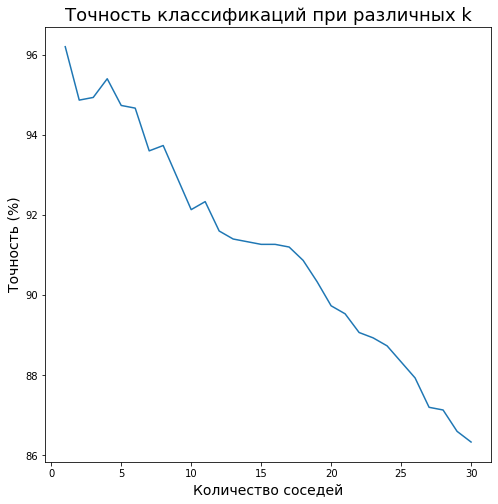

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.set_xlabel('Количество соседей', fontsize = 14)
ax.set_ylabel('Точность (%)', fontsize = 14)
ax.set_title('Точность классификаций при различных k', fontsize = 18)
ax.plot(K1, A1, linestyle='-')
plt.show()

Проверим точность классификаций при различных k (количество соседей) с использованием метода главных компонент при различных n (количество компонент).

Точность при k=2 и n=1: 27.333333333333332%
Точность при k=5 и n=1: 29.599999999999998%
Точность при k=10 и n=1: 32.666666666666664%
Точность при k=15 и n=1: 32.33333333333333%
Точность при k=20 и n=1: 34.266666666666666%
Точность при k=25 и n=1: 35.8%
Точность при k=30 и n=1: 35.53333333333333%
Точность при k=2 и n=2: 54.93333333333334%
Точность при k=5 и n=2: 60.266666666666666%
Точность при k=10 и n=2: 62.66666666666667%
Точность при k=15 и n=2: 62.93333333333333%
Точность при k=20 и n=2: 64.06666666666668%
Точность при k=25 и n=2: 62.26666666666667%
Точность при k=30 и n=2: 62.2%
Точность при k=2 и n=5: 85.86666666666667%
Точность при k=5 и n=5: 89.26666666666667%
Точность при k=10 и n=5: 87.66666666666667%
Точность при k=15 и n=5: 86.8%
Точность при k=20 и n=5: 85.66666666666667%
Точность при k=25 и n=5: 84.93333333333334%
Точность при k=30 и n=5: 83.26666666666667%
Точность при k=2 и n=10: 93.53333333333333%
Точность при k=5 и n=10: 91.86666666666666%
Точность при k=10 и n=10: 90

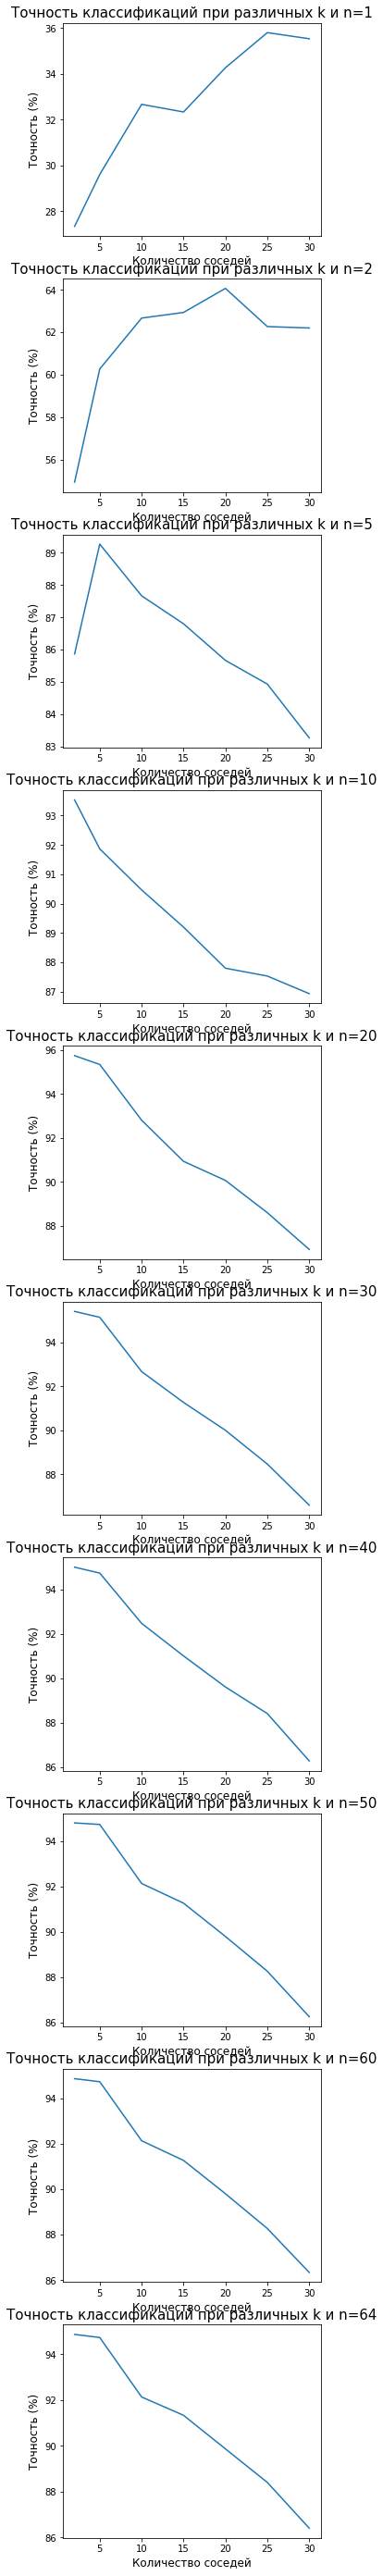

In [11]:
N2 = np.array([1, 2, 5, 10, 20, 30, 40, 50, 60, 64])
K2 = np.array([2, 5, 10, 15, 20, 25, 30])
A2 = np.zeros((len(N2), len(K2)))

fig, axes = plt.subplots(nrows=len(N2), ncols=1, figsize = (5, 5 * len(N2)))

for i,n in enumerate(N2):
    for j,k in enumerate(K2):
        A2[i, j] = classificator_PCA(X, labels, k, n)
        print("Точность при k=", k, " и n=", n, ": ", A2[i, j], "%", sep="")
    
    axes[i].set_xlabel('Количество соседей', fontsize = 12)
    axes[i].set_ylabel('Точность (%)', fontsize = 12)
    axes[i].set_title('Точность классификаций при различных k и n='+str(n), fontsize = 15)
    axes[i].plot(K2, A2[i], linestyle='-')
    print('==============================================')
    
plt.show()

In [12]:
max_index = A2.argmax()
x, y = max_index // A2.shape[1], max_index % A2.shape[1]
print('При параметрах k=', K2[y], ', n=', N2[x], 
      ' алгоритм даёт наибольшую точность на тестовой выборке = ', A2[x, y], '%', sep='')

При параметрах k=2, n=20 алгоритм даёт наибольшую точность на тестовой выборке = 95.73333333333333%


При параметрах k=2, n=20 алгоритм даёт наибольшую точность на тестовой выборке.

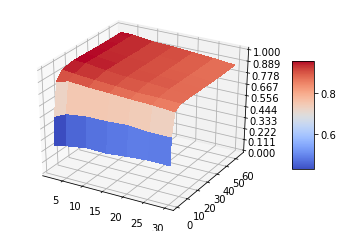

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(K2, N2)
Z = A2 / 100

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
    
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
                           
# fig.set_figwidth(12)
# fig.set_figheight(7)

plt.show()